#### Load simexpal results

In [19]:
import matplotlib.pyplot as plt
import simexpal
import yaml
import subprocess

cfg = simexpal.config_for_dir() # load expermiments.yml

results = []
for run in cfg.collect_successful_results():  # load successfull results from output/*
    with run.open_output_file() as f:
        yml = yaml.load(f, Loader=yaml.SafeLoader)
    results.append(yml)
    
results

[{'algo': 'dynamic_modulo', 'max_fill': 0.5, 'subtables': 1, 'time': 14280},
 {'algo': 'dynamic_scaling', 'max_fill': 0.5, 'subtables': 1, 'time': 15803},
 {'algo': 'stl', 'max_fill': 0.5, 'subtables': 1, 'time': 45829},
 {'algo': 'static', 'max_fill': 0.5, 'subtables': 1, 'time': 9214},
 {'algo': 'dynamic_modulo', 'max_fill': 0.8, 'subtables': 1, 'time': 14208},
 {'algo': 'dynamic_scaling', 'max_fill': 0.8, 'subtables': 1, 'time': 16153},
 {'algo': 'stl', 'max_fill': 0.8, 'subtables': 1, 'time': 45840},
 {'algo': 'static', 'max_fill': 0.8, 'subtables': 1, 'time': 9283},
 {'algo': 'dynamic_modulo', 'max_fill': 0.9, 'subtables': 1, 'time': 14331},
 {'algo': 'dynamic_scaling', 'max_fill': 0.9, 'subtables': 1, 'time': 17034},
 {'algo': 'dysect', 'max_fill': 0.9, 'subtables': 1, 'time': 14640},
 {'algo': 'dysect', 'max_fill': 0.9, 'subtables': 2, 'time': 14785},
 {'algo': 'dysect', 'max_fill': 0.9, 'subtables': 4, 'time': 14128},
 {'algo': 'dysect', 'max_fill': 0.9, 'subtables': 8, 'time':

#### Helper function for cache analysis

In [5]:
def run(cmd):
    proc = subprocess.Popen(cmd, stdout = subprocess.PIPE, stderr = subprocess.PIPE)
    stdout, stderr = proc.communicate()
    return stdout, stderr

def vec(algo, attr):
    filtered_res = list(filter(lambda x: x['algo'] == algo, results))
    return [i[attr] for i in filtered_res]

# Exercise 4

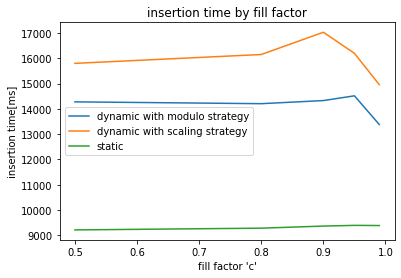

In [6]:
def vec(algo, attr):
    filtered_res = list(filter(lambda x: x['algo'] == algo, results))
    return [i[attr] for i in filtered_res]

x = vec('static', 'max_fill')

# plot the insertion
plt.plot(x, vec('dynamic_modulo', 'time'), label = 'dynamic with modulo strategy')
plt.plot(x, vec('dynamic_scaling', 'time'), label = 'dynamic with scaling strategy')
plt.plot(x, vec('static', 'time'), label = 'static')
#plt.plot(x, vec('stl', 'time'), label = 'stl')
plt.title('insertion time by fill factor')
plt.xlabel("fill factor 'c'")
plt.ylabel('insertion time[ms]')
plt.legend()
plt.show()

### Question: What fraction of cache-misses can be avoided by using scaling?
* Cache misses with **modulo strategy**:

In [16]:
# perf prints to stderr, our hashing program to stdout
out, err = run(["perf","stat","-e","cache-references,cache-misses","./dev-builds/hashing/bin/hashing","--algo","dynamic_modulo"])
print(err.decode('utf-8').strip())

Running microbenchmark...

 Performance counter stats for './dev-builds/hashing/bin/hashing --algo dynamic_modulo':

       375.924.414      cache-references:u                                          
       249.214.741      cache-misses:u            #   66,294 % of all cache refs    

      21,146493084 seconds time elapsed

      19,194856000 seconds user
       1,896660000 seconds sys


* Cache misses with **scaling strategy**:

In [17]:
# perf prints to stderr, our hashing program to stdout
out, err = run(["perf","stat","-e","cache-references,cache-misses","./dev-builds/hashing/bin/hashing","--algo","dynamic_scaling"])
print(err.decode('utf-8').strip())

Running microbenchmark...

 Performance counter stats for './dev-builds/hashing/bin/hashing --algo dynamic_scaling':

       377.599.224      cache-references:u                                          
       251.581.936      cache-misses:u            #   66,627 % of all cache refs    

      20,923148984 seconds time elapsed

      19,119406000 seconds user
       1,801473000 seconds sys


### Solution: 
Until now, the scaling strategy performs worse than the modulo strategy. It also has more cache misses which should not be the case. 

**TODO**: Fix implementation

### Task: Investigate how the number of subtables affects performance by plotting the running time of the algorithm vs. the number of subtables. Use c = 0.9 in this experiment. Perform experiments with 1, 2, 4, 8, 16 and 32 subtables

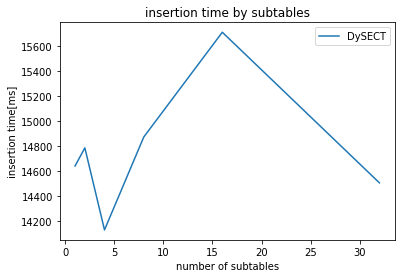

In [22]:
plt.plot(vec('dysect', 'subtables'), vec('dysect', 'time'), label = 'DySECT')
plt.title('insertion time by subtables')
plt.xlabel("number of subtables")
plt.ylabel('insertion time[ms]')
plt.legend()
plt.show()